C:\Users\patri\AppData\Local\Temp\ipykernel_1260\2986901502.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
C:\Users\patri\AppData\Local\Temp\ipykernel_1260\2986901502.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')
C:\Users\patri\AppData\Local\Temp\ipykernel_1260\2986901502.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')


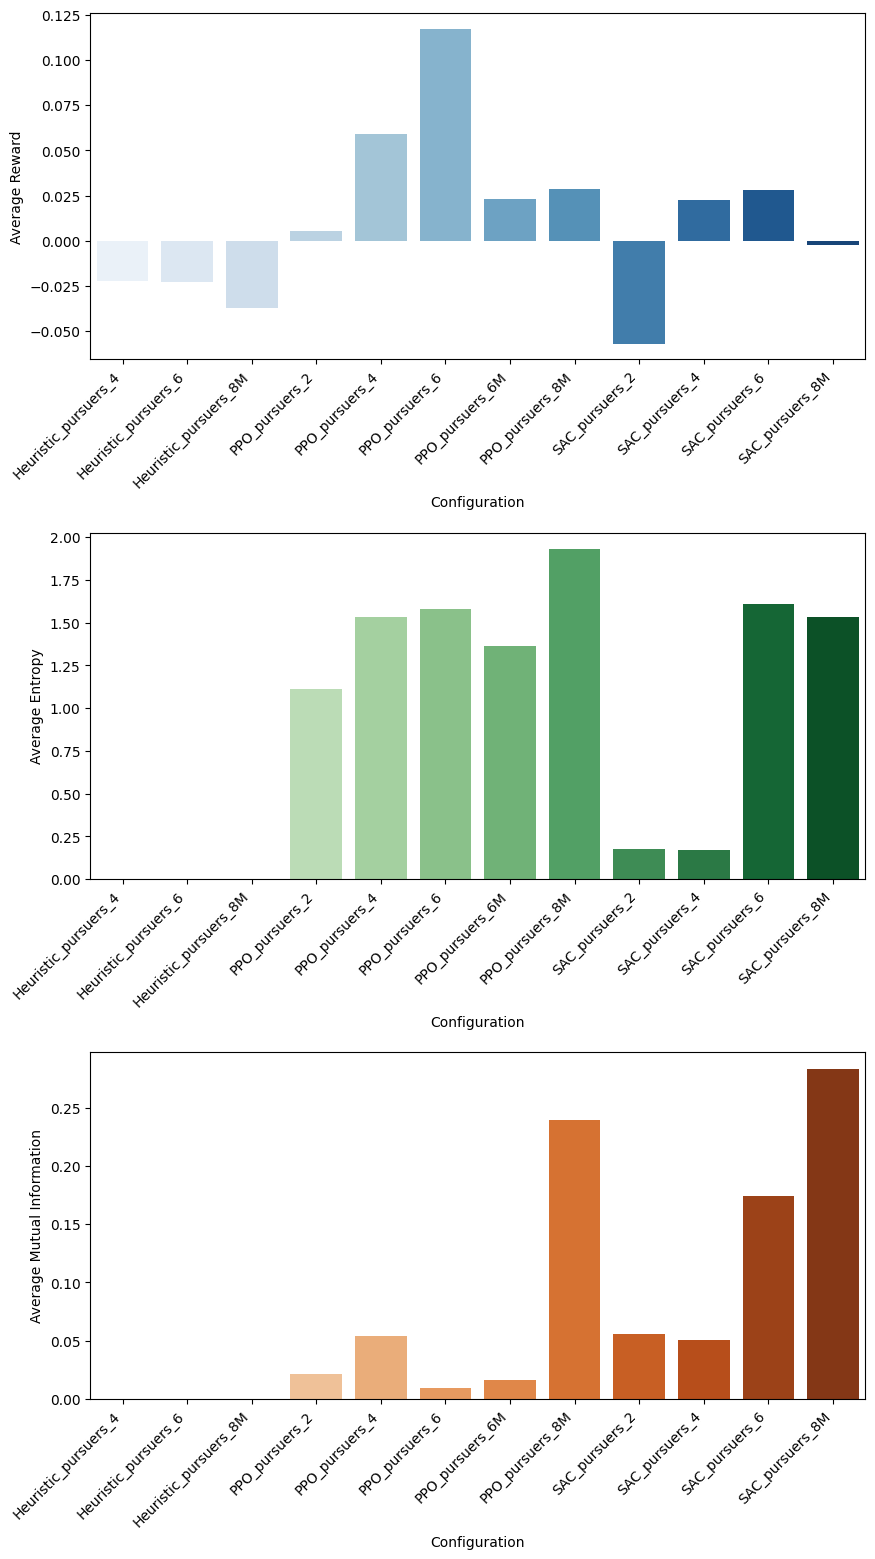

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

path = r"results\20240419-020215"

df = pd.read_csv(path+'\comparative_analysis.csv')
df['Configuration'] = df['Configuration'].astype('category')

# Generate the bar plots
fig, ax = plt.subplots(3, figsize=(10, 15), dpi=100)
sns.barplot(x='Configuration', y='Average Reward', hue='Configuration', data=df, ax=ax[0], palette='Blues', legend=False)
sns.barplot(x='Configuration', y='Average Entropy', hue='Configuration', data=df, ax=ax[1], palette='Greens', legend=False)
sns.barplot(x='Configuration', y='Average Mutual Information', hue='Configuration', data=df, ax=ax[2], palette='Oranges', legend=False)

# Adjust the x-axis labels to center them under each bar
for axis in ax:
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha='right')


# Adjust figure size and spacing
fig.set_size_inches(10, 18)  # Increase the height of the figure
fig.subplots_adjust(hspace=0.5)  # Increase the vertical spacing between subplots

# Show the plot
plt.savefig(path+'\comparative_analysis.png')
        

In [3]:
from PIL import Image, ImageDraw, ImageFont
import os
import math
import datetime

current_date = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Define the directory containing the images
base_directory = 'images'
merged_images_directory = os.path.join(base_directory, f"a_directory_of_merged_images/{current_date}")
os.makedirs(merged_images_directory, exist_ok=True)

# Function to merge images into a square grid with labels
def merge_images_in_square_grid(image_list, output_path):
    num_images = len(image_list)
    grid_size = math.ceil(math.sqrt(num_images))  # Determine grid size
    
    images = [Image.open(os.path.join(base_directory, f)) for f in image_list if f.endswith('.png')]
    
    # Determine max width and max height of a single image in the list for uniform sizing
    max_width = max(img.width for img in images)
    max_height = max(img.height for img in images) + 40  # Adding space for text

    # Calculate the dimensions of the composite image
    composite_width = grid_size * max_width
    composite_height = grid_size * max_height

    # Create a new image to hold the grid
    composite_image = Image.new('RGB', (composite_width, composite_height), "white")
    draw = ImageDraw.Draw(composite_image)

    # Load a font or use default if not available
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except IOError:
        font = ImageFont.load_default()

    # Paste images into the grid and label them
    x_offset = 0
    y_offset = 0
    for i, (img, filename) in enumerate(zip(images, image_list)):
        filename_no_ext = os.path.splitext(filename)[0]  # Remove the .png extension
        composite_image.paste(img, (x_offset, y_offset + 40))  # Offset y to allow space for text
        draw.text((x_offset, y_offset), filename_no_ext, font=font, fill="black")  # Draw filename above image
        x_offset += max_width
        if (i + 1) % grid_size == 0:  # Move to next row after filling one row
            x_offset = 0
            y_offset += max_height

    # Save the composite image
    composite_image.save(output_path)

# Organize files by analysis type
analysis_dict = {}
for filename in os.listdir(base_directory):
    if filename.endswith('.png'):
        analysis_type = filename.split('_')[0]
        if analysis_type not in analysis_dict:
            analysis_dict[analysis_type] = []
        analysis_dict[analysis_type].append(filename)

# Merge images for each analysis type into a square grid
for analysis, files in analysis_dict.items():
    output_file_path = os.path.join(merged_images_directory, f"{analysis}_square_merged_labeled.png")
    merge_images_in_square_grid(files, output_file_path)

print("Images have been merged into square grids, labeled (without .png), and saved.")

Images have been merged into square grids, labeled (without .png), and saved.
